In [1]:
#Import libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# Import the sklearn library 
from sklearn.cluster import KMeans
from sklearn.preprocessing import scale

In [2]:
# Load Data
MIS=pd.read_csv('KMeans_GIA_MIS.csv')
MIS=np.round(MIS, decimals=2)

In [3]:
MIS.head()

Audit Division  Ave Actual Days  Ave Total issues (3,4,5)
0          AM SWITZERLAND-Z4LR            50.00                      0.00
1      AMERICAS AUDIT-581-IKRR           439.00                      4.00
2    APPLICATION IT AUDIT-OB4D            91.78                      0.44
3  ASSET MANAGEMENT AUDIT-GVYV           148.48                      2.33
4   COMPLIANCE & ORC-E7JLDEL_1           226.76                      2.71

In [4]:
# Shortening the column names
MIS.columns = ['Group', 'Days', 'Issues']

In [5]:
MIS.columns

Index(['Group', 'Days', 'Issues'], dtype='object')

In [6]:
# Use the info() function
MIS.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54 entries, 0 to 53
Data columns (total 3 columns):
Group     54 non-null object
Days      53 non-null float64
Issues    54 non-null float64
dtypes: float64(2), object(1)
memory usage: 1.3+ KB


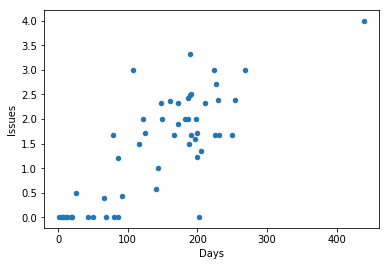

In [7]:
# Since both are numeric, we need to plot them on a scatter graph
MIS.plot.scatter(x='Days', y='Issues')

In [8]:
# Droping the 'Group' column as it is not numeric.
MIS = MIS.drop(['Group'], axis=1)
MIS

Days  Issues
0    50.00    0.00
1   439.00    4.00
2    91.78    0.44
3   148.48    2.33
4   226.76    2.71
5     5.00    0.00
6   186.19    2.43
7   171.89    1.89
8   231.59    1.67
9   199.33    1.22
10  122.00    2.00
11  202.00    0.00
12   11.00    0.00
13   43.00    0.00
14   13.33    0.00
15  187.00    2.00
16  229.62    2.38
17  144.25    1.00
18   18.00    0.00
19  149.50    2.00
20  167.11    1.67
21  172.33    2.33
22   20.00    0.00
23   86.40    1.20
24  108.00    3.00
25  125.43    1.71
26   78.67    1.67
27  190.33    1.67
28  199.00    1.71
29  187.50    1.50
30   80.00    0.00
31  189.93    2.48
32    2.00    0.00
33   86.00    0.00
34   69.00    0.00
35  198.70    2.00
36   65.76    0.40
37  160.73    2.36
38  211.67    2.33
39  205.73    1.36
40  225.00    1.67
41  189.92    3.33
42    7.00    0.00
43  253.57    2.38
44   25.75    0.50
45  116.00    1.50
46  268.71    3.00
47  223.50    3.00
48     NaN    0.00
49  183.00    2.00
50  249.17    1.67
51  190.25    2.50
52  197.00    1.60
53  140.00    0.57

In [9]:
# data Cleansing replacing NaN with zero
MIS = MIS.fillna(0)

In [10]:
# Running the kmeans function and store the result in our variable, 'model'
model = KMeans(n_clusters=4)
# fitting our kmeans model to our data. 
model.fit(scale(MIS))


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [11]:
# Adding a colum of which cluster the data belong to
MIS['cluster'] = model.labels_
MIS

Days  Issues  cluster
0    50.00    0.00        1
1   439.00    4.00        2
2    91.78    0.44        1
3   148.48    2.33        3
4   226.76    2.71        3
5     5.00    0.00        1
6   186.19    2.43        3
7   171.89    1.89        0
8   231.59    1.67        0
9   199.33    1.22        0
10  122.00    2.00        0
11  202.00    0.00        0
12   11.00    0.00        1
13   43.00    0.00        1
14   13.33    0.00        1
15  187.00    2.00        0
16  229.62    2.38        3
17  144.25    1.00        0
18   18.00    0.00        1
19  149.50    2.00        0
20  167.11    1.67        0
21  172.33    2.33        3
22   20.00    0.00        1
23   86.40    1.20        0
24  108.00    3.00        3
25  125.43    1.71        0
26   78.67    1.67        0
27  190.33    1.67        0
28  199.00    1.71        0
29  187.50    1.50        0
30   80.00    0.00        1
31  189.93    2.48        3
32    2.00    0.00        1
33   86.00    0.00        1
34   69.00    0.00        1
35  198.70    2.00        0
36   65.76    0.40        1
37  160.73    2.36        3
38  211.67    2.33        3
39  205.73    1.36        0
40  225.00    1.67        0
41  189.92    3.33        3
42    7.00    0.00        1
43  253.57    2.38        3
44   25.75    0.50        1
45  116.00    1.50        0
46  268.71    3.00        3
47  223.50    3.00        3
48    0.00    0.00        1
49  183.00    2.00        0
50  249.17    1.67        0
51  190.25    2.50        3
52  197.00    1.60        0
53  140.00    0.57        0

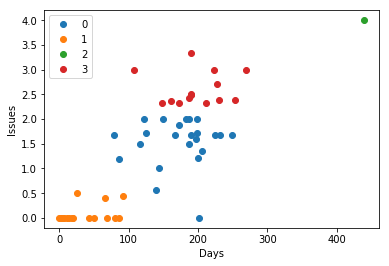

In [12]:
# Creating a group for each cluster using the groupby function
groups = MIS.groupby('cluster')
#Plot the clusters!
fig, ax = plt.subplots()
for name, group in groups:
    ax.plot(group.Days, group.Issues, marker='o', linestyle='', label=name)
# Add axis labels appropriately
plt.xlabel('Days')
plt.ylabel('Issues')
ax.legend()
plt.show()

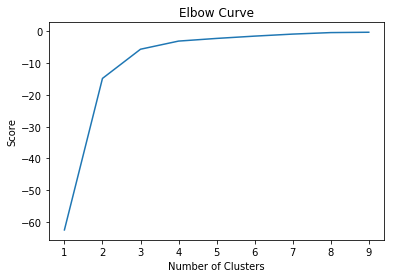

In [13]:
# WSS elbow test
# First specify what will go on our X and Y axes
X = MIS[['Days']]
Y = MIS[['Issues']]
# 
Nc = range(1, 10)
kmeans = [KMeans(n_clusters=i) for i in Nc]
score = [kmeans[i].fit(Y).score(Y) for i in range(len(kmeans))]
plt.plot(Nc,score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()